In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gun_df = pd.read_csv('./data/stage3.csv')

In [2]:
import scipy.stats as stats

In [3]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [4]:
def col_to_list(col_string):
    try:
        col_string = col_string.replace('||', '|')
        col_string = col_string.replace('::', ':')
        col_string = col_string.split('|')
        col_list = []
        for person in col_string:
            person = person.split(':')
            col_list.append(person[1])
        return col_list
    except:
        return []

participant_list = gun_df['participant_type'].map(col_to_list)

gun_df['participant_type'] = participant_list

In [8]:
gun_df.head(20)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,"[Victim, Victim, Victim, Victim, Subject-Suspect]",http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,"[Victim, Victim, Victim, Victim, Subject-Suspect]",http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...","[Subject-Suspect, Subject-Suspect, Victim, Vic...",http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,"[Victim, Victim, Victim, Subject-Suspect]",http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,"[Victim, Victim, Victim, Subject-Suspect]",http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,"[Victim, Victim, Victim, Victim, Subject-Suspe...",http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,"[Victim, Victim, Victim, Victim, Victim, Subje...",http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0::M

In [5]:
def col_to_dict(col_string):
    try:
        col_string = col_string.replace('||', '|')
        col_string = col_string.replace('::', ':')
        col_string = col_string.split('|')
        col_dict = dict()
        for person in col_string:
            person = person.split(':')
            col_dict[int(person[0])] = person[1]
        return col_dict
    except:
        return {}
    

columns_to_change = ['participant_age', 'participant_age_group', 'participant_gender', 'participant_status']

for col in columns_to_change:
    gun_df[col] = gun_df[col].map(col_to_dict)

In [6]:
gun_df.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,{0: '20'},"{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Male', 1: 'Male', 3: 'Male', 4: 'Female'}",0::Julian Sims,NaN,"{0: 'Arrested', 1: 'Injured', 2: 'Injured', 3:...","[Victim, Victim, Victim, Victim, Subject-Suspect]",http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,{0: '20'},"{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...",{0: 'Male'},0::Bernard Gillis,NaN,"{0: 'Killed', 1: 'Injured', 2: 'Injured', 3: '...","[Victim, Victim, Victim, Victim, Subject-Suspect]",http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"{0: '25', 1: '31', 2: '33', 3: '34', 4: '33'}","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Male', 1: 'Male', 2: 'Male', 3: 'Male', 4...",0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"{0: 'Injured, Unharmed, Arrested', 1: 'Unharme...","[Subject-Suspect, Subject-Suspect, Victim, Vic...",http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,"{0: '29', 1: '33', 2: '56', 3: '33'}","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Female', 1: 'Male', 2: 'Male', 3: 'Male'}",0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,"{0: 'Killed', 1: 'Killed', 2: 'Killed', 3: 'Ki...","[Victim, Victim, Victim, Subject-Suspect]",http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,"{0: '18', 1: '46', 2: '14', 3: '47'}","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Teen 12-1...","{0: 'Female', 1: 'Male', 2: 'Male', 3: 'Female'}",0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,"{0: 'Injured', 1: 'Injured', 2: 'Killed', 3: '...","[Victim, Victim, Victim, Subject-Suspect]",http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,"{0: '23', 1: '23', 2: '33', 3: '55'}","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Female', 1: 'Female', 2: 'Female', 3: 'Fe...",0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,"{0: 'Killed', 1: 'Killed', 2: 'Killed', 3: 'Ki...","[Victim, Victim, Victim, Victim, Subject-Suspe...",http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,"{0: '51', 1: '40', 2: '9', 3: '5', 4: '2', 5: ...","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Child 0-1...","{0: 'Male', 1: 'Female', 2: 'Male', 3: 'Female...",0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,"{0: 'Killed', 1: 'Killed', 2: 'Killed', 3: 'Ki...","[Victim, Victim, Victim, Victim, Victim, Subje...",http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle St

In [6]:
def modify_age_group_row(r):
    new_list = [np.nan] * len(r['participant_type'])
    for k, v in r['participant_age_group'].items():
        new_list[k] = v
    r['participant_age_group'] = new_list
    return r

participant_age_group_col = gun_df.apply(modify_age_group_row, axis=1)['participant_age_group']
participant_age_group_col

0         [Adult 18+, Adult 18+, Adult 18+, Adult 18+, A...
1         [Adult 18+, Adult 18+, Adult 18+, Adult 18+, nan]
2         [Adult 18+, Adult 18+, Adult 18+, Adult 18+, A...
3              [Adult 18+, Adult 18+, Adult 18+, Adult 18+]
4             [Adult 18+, Adult 18+, Teen 12-17, Adult 18+]
                                ...                        
239672                                          [Adult 18+]
239673                               [Adult 18+, Adult 18+]
239674                                          [Adult 18+]
239675                                          [Adult 18+]
239676                               [Adult 18+, Adult 18+]
Name: participant_age_group, Length: 239677, dtype: object

In [7]:
def modify_status_row(r):
    new_list = [np.nan] * len(r['participant_type'])
    for k, v in r['participant_status'].items():
        new_list[k] = v
    r['participant_status'] = new_list
    return r

participant_status_col = gun_df.apply(modify_status_row, axis=1)['participant_status']
participant_status_col

0            [Arrested, Injured, Injured, Injured, Injured]
1                  [Killed, Injured, Injured, Injured, nan]
2         [Injured, Unharmed, Arrested, Unharmed, Arrest...
3                          [Killed, Killed, Killed, Killed]
4                        [Injured, Injured, Killed, Killed]
                                ...                        
239672                                 [Unharmed, Arrested]
239673                         [Killed, Unharmed, Arrested]
239674                                            [Injured]
239675                                             [Killed]
239676                                     [Killed, Killed]
Name: participant_status, Length: 239677, dtype: object

In [8]:
def modify_gender_row(r):
    new_list = [np.nan] * len(r['participant_type'])
    for k, v in r['participant_gender'].items():
        new_list[k] = v
    r['participant_gender'] = new_list
    return r

participant_gender_col = gun_df.apply(modify_gender_row, axis=1)['participant_gender']
participant_gender_col


0         [Male, Male, nan, Male, Female]
1              [Male, nan, nan, nan, nan]
2          [Male, Male, Male, Male, Male]
3              [Female, Male, Male, Male]
4            [Female, Male, Male, Female]
                       ...               
239672                           [Female]
239673                       [Male, Male]
239674                             [Male]
239675                             [Male]
239676                     [Female, Male]
Name: participant_gender, Length: 239677, dtype: object

In [9]:
sub_df = gun_df[['incident_id', 'date', 'state', 'city_or_county', 'n_killed', 'n_injured', 'congressional_district', 'incident_characteristics', 'latitude', 'longitude', 'participant_type']].copy()
sub_df

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,"[Victim, Victim, Victim, Victim, Subject-Suspect]"
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,"[Victim, Victim, Victim, Victim, Subject-Suspect]"
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,"[Subject-Suspect, Subject-Suspect, Victim, Vic..."
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,"[Victim, Victim, Victim, Subject-Suspect]"
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,"[Victim, Victim, Victim, Subject-Suspect]"
...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,0,0,NaN,Shots Fired - No Injuries,NaN,NaN,[Subject-Suspect]
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,4.0,"Shot - Dead (murder, accidental, suicide)||Ins...",31.7537,-93.0836,"[Victim, Subject-Suspect]"
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,2.0,Shot - Wounded/Injured,29.9239,-90.0442,[Victim]
239675,1082514,2018-03-31,Texas,Houston,1,0,9.0,"Shot - Dead (murder, accidental, suicide)",29.7201,-95.6110,[Victim]


In [10]:
col1 = participant_age_group_col.explode()
col2 = participant_gender_col.explode()
col3 = participant_status_col.explode()

age_gender_status_df = pd.concat([col1, col2, col3], axis=1)
age_gender_status_df

,participant_age_group,participant_gender,participant_status
0,Adult 18+,Male,Arrested
0,Adult 18+,Male,Injured
0,Adult 18+,NaN,Injured
0,Adult 18+,Male,Injured
0,Adult 18+,Female,Injured
...,...,...,...
239673,Adult 18+,Male,"Unharmed, Arrested"
239674,Adult 18+,Male,Injured
239675,Adult 18+,Male,Killed
239676,Adult 18+,Female,Killed


# Here is the fully exploded and joined data set

In [11]:
new_gun_df = pd.concat([sub_df.explode('participant_type'), age_gender_status_df], axis=1)
new_gun_df

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_type,participant_age_group,participant_gender,participant_status
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Victim,Adult 18+,Male,Arrested
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Victim,Adult 18+,Male,Injured
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Victim,Adult 18+,NaN,Injured
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Victim,Adult 18+,Male,Injured
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Subject-Suspect,Adult 18+,Female,Injured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,4.0,"Shot - Dead (murder, accidental, suicide)||Ins...",31.7537,-93.0836,Subject-Suspect,Adult 18+,Male,"Unharmed, Arrested"
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,2.0,Shot - Wounded/Injured,29.9239,-90.0442,Victim,Adult 18+,Male,Injured
239675,1082514,2018-03-31,Texas,Houston,1,0,9.0,"Shot - Dead (murder, accidental, suicide)",29.7201,-95.6110,Victim,Adult 18+,Male,Killed
239676,1081940,2018-03-31,Maine,Norridgewock,2,0,2.0,"Shot - Dead (murder, accidental, suicide)||Sui...",44.7293,-69.7691,Victim,Adult 18+,Female,Killed


## Breakdown by suspect/victim, gender, and age

In [12]:
new_gun_df.groupby(['participant_type', 'participant_gender', 'participant_age_group']).aggregate('count')['incident_id'].to_frame()

incident_id
participant_type participant_gender participant_age_group             
Subject-Suspect  Female             Adult 18+                    10581
                                    Child 0-11                      38
                                    Teen 12-17                     532
                 Male               Adult 18+                   138902
                                    Child 0-11                     398
                                    Teen 12-17                   10693
Victim           Female             Adult 18+                    26007
                                    Child 0-11                    1173
                                    Teen 12-17                    2063
                 Male               Adult 18+                   118413
                                    Child 0-11                    2095
                                    Teen 12-17                    9546
                 Male, female       Adult 18+                        1

In [13]:
new_gun_df[(new_gun_df['participant_type'] == 'Victim') & (new_gun_df['participant_status'].str.contains('Arrested'))]

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_type,participant_age_group,participant_gender,participant_status
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Victim,Adult 18+,Male,Arrested
234,492985,2013-11-03,California,Perris,0,5,41.0,Shot - Wounded/Injured||Drive-by (car to stree...,33.8249,-117.2270,Victim,Adult 18+,Male,"Injured, Arrested"
317,92418,2014-01-01,New Jersey,Clementon,0,0,1.0,Armed robbery with injury/death and/or evidenc...,39.7981,-75.0288,Victim,Teen 12-17,Male,"Unharmed, Arrested"
1032,93682,2014-01-06,Oregon,Hillsboro,0,1,1.0,Shot - Wounded/Injured||Gang involvement||Poss...,45.5252,-122.9920,Victim,Adult 18+,Male,"Injured, Arrested"
2218,96649,2014-01-14,Pennsylvania,Stroudsburg,1,0,17.0,"Shot - Dead (murder, accidental, suicide)||Dri...",40.9764,-75.2797,Victim,Adult 18+,Male,"Killed, Arrested"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238305,1076074,2018-03-22,Missouri,Saint Charles,0,1,3.0,Shot - Wounded/Injured,38.7772,-90.4916,Victim,Adult 18+,Male,"Unharmed, Arrested"
238344,1077602,2018-03-22,California,Red Bluff,0,0,1.0,Non-Shooting Incident||Home Invasion||Home Inv...,40.1405,-122.2110,Victim,Adult 18+,Male,"Unharmed, Arrested"
238620,1077641,2018-03-24,New York,Westbury,0,1,4.0,Shot - Wounded/Injured||Home Invasion||Home In...,40.7529,-73.5701,Victim,Adult 18+,Male,"Unharmed, Arrested"
238809,1079551,2018-03-25,Indiana,Syracuse,0,1,2.0,Shot - Wounded/Injured||Defensive Use||Defensi...,41.4350,-85.7564,Victim,Teen 12-17,Male,"Unharmed, Arrested"


## Victim outcome breakdown by gender and age

In [14]:
new_gun_df[new_gun_df['participant_type'] == 'Victim'].groupby(['participant_gender', 'participant_age_group', 'participant_status']).aggregate('count')['incident_id'].to_frame()

incident_id
participant_gender participant_age_group participant_status                      
Female             Adult 18+             Arrested                               7
                                         Injured                            12205
                                         Injured, Arrested                     31
                                         Injured, Unharmed                      3
                                         Killed                              7608
                                         Killed, Arrested                       2
                                         Killed, Injured                        1
                                         Killed, Unharmed                       1
                                         Unharmed                            5887
                                         Unharmed, Arrested                    84
                   Child 0-11            Injured                              639
                                         Killed                               338
                                         Unharmed                             192
                                         Unharmed, Arrested                     1
                   Teen 12-17            Injured                             1330
                                         Injured, Arrested                      3
                                         Killed                               458
                                         Killed, Arrested                       1
                                         Unharmed                             251
                                         Unharmed, Arrested                     1
Male               Adult 18+             Arrested                              55
                                         Injured                            67486
                                         Injured, Arrested                    527
                                         Injured, Unharmed                     16
                                         Injured, Unharmed, Arrested            2
                                         Killed                             38161
                                         Killed, Arrested                      12
                                         Killed, Injured                        7
                                         Killed, Unharmed                       5
                                         Killed, Unharmed, Arrested             3
                                         Unharmed                           11083
                                         Unharmed, Arrested                   675
                   Child 0-11            Injured                             1088
                                         Killed                               568
                                         Unharmed                             429
                                         Unharmed, Arrested                     3
                   Teen 12-17            Arrested                               8
                                         Injured                             6630
                                         Injured, Arrested                     33
                                         Killed                              2264
                                         Killed, Injured                        1
                                         Unharmed                             538
                                         Unharmed, Arrested                    50
Male, female       Adult 18+             Injured                                1

In [15]:
new_gun_df['participant_status'] = new_gun_df['participant_status'].fillna(value='Unknown')

In [16]:
new_gun_df[new_gun_df['participant_status'].str.contains('Killed')].groupby('participant_gender').aggregate('count')['incident_id']

participant_gender
Female     8936
Male      50340
Name: incident_id, dtype: int64

In [17]:
gun_df['incident_characteristics'].str.contains('Non-Shooting Incident').sum() / len(gun_df)

0.1870726018766924

In [18]:
new_gun_df['incident_characteristics'] = new_gun_df['incident_characteristics'].fillna(value='Unknown')

In [19]:
assault_weapon_df = new_gun_df[new_gun_df['incident_characteristics'].str.contains('Assault weapon')]
awcas = assault_weapon_df.groupby('incident_id').aggregate('mean')[['n_killed', 'n_injured']]
assault_weapon_df['incident_characteristics'].str.contains('Non-Shooting Incident').sum() / len(assault_weapon_df)


0.5190078813166434

## Plotting age and gender breakdowns

<AxesSubplot:xlabel='participant_gender,participant_age_group'>

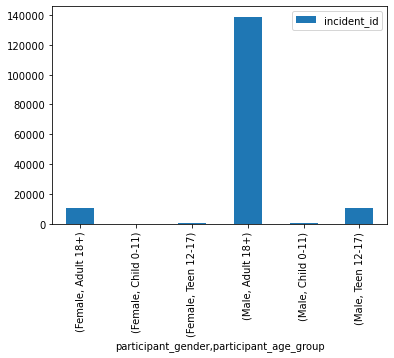

In [21]:
new_gun_df = new_gun_df[new_gun_df['participant_gender'] != 'Male, female']
suspect_breakdown = new_gun_df[new_gun_df['participant_type'] == 'Subject-Suspect'].groupby(['participant_gender', 'participant_age_group']).aggregate('count')['incident_id'].to_frame()
suspect_breakdown.plot.bar()

In [20]:
victim_breakdown = new_gun_df[new_gun_df['participant_type'] == 'Victim'].groupby(['participant_gender', 'participant_age_group']).aggregate('count')['incident_id'].to_frame()
victim_breakdown = victim_breakdown.reindex(['Child 0-11', 'Teen 12-17', 'Adult 18+'], level=1)
victim_breakdown

incident_id
participant_gender participant_age_group             
Female             Child 0-11                    1173
                   Teen 12-17                    2063
                   Adult 18+                    26007
Male               Child 0-11                    2095
                   Teen 12-17                    9546
                   Adult 18+                   118413
Male, female       Adult 18+                        1

In [257]:
def create_breakdown_plot(category, super_title):
    suspect_breakdown = category[category['participant_type'] == 'Subject-Suspect'].groupby(['participant_gender', 'participant_age_group']).aggregate('count')['incident_id'].to_frame()
    suspect_breakdown = suspect_breakdown.reindex(['Child 0-11', 'Teen 12-17', 'Adult 18+'], level=1)
    victim_breakdown = category[category['participant_type'] == 'Victim'].groupby(['participant_gender', 'participant_age_group']).aggregate('count')['incident_id'].to_frame()
    victim_breakdown = victim_breakdown.reindex(['Child 0-11', 'Teen 12-17', 'Adult 18+'], level=1)

    male_suspects = suspect_breakdown.loc['Male']
    female_suspects = suspect_breakdown.loc['Female']
    male_victims = victim_breakdown.loc['Male']
    female_victims = victim_breakdown.loc['Female']
    
    age_group_list = ['Child 0-11', 'Teen 12-17', 'Adult 18+']
    
    male_suspects_array = []
    for age_group in age_group_list:
        if age_group in male_suspects.index:
            male_suspects_array.append(male_suspects.loc[age_group].values[0])
        else:
            male_suspects_array.append(0)
    
    female_suspects_array = []
    for age_group in age_group_list:
        if age_group in female_suspects.index:
            female_suspects_array.append(female_suspects.loc[age_group].values[0])
        else:
            female_suspects_array.append(0)
    
    male_victims_array = []
    for age_group in age_group_list:
        if age_group in male_victims.index:
            male_victims_array.append(male_victims.loc[age_group].values[0])
        else:
            male_suspects_array.append(0)
    
    female_victims_array = []
    for age_group in age_group_list:
        if age_group in female_victims.index:
            female_victims_array.append(female_victims.loc[age_group].values[0])
        else:
            female_suspects_array.append(0)

    
    fig, axs = plt.subplots(1, 2, figsize=(10,6))
    n = np.arange(3)
    width = 0.35
    axs[0].bar(n - width/2, male_suspects_array, width, label='Male')
    axs[0].bar(n + width/2, female_suspects_array, width, label='Female')
    axs[0].set_title('Suspect Genders and Age Groups')
    axs[0].set_ylabel('Number of Suspects')
    axs[0].set_xticks(n)
    axs[0].set_xticklabels(['Child, 0-11', 'Teen, 12-17', 'Adult, 18+'])
    axs[0].legend()

    axs[1].bar(n - width/2, male_victims_array, width, label='Male')
    axs[1].bar(n + width/2, female_victims_array, width, label='Female')
    axs[1].set_title('Victim Genders and Age Groups')
    axs[1].set_ylabel('Number of Victims')
    axs[1].set_xticks(n)
    axs[1].set_xticklabels(['Child, 0-11', 'Teen, 12-17', 'Adult, 18+'])
    
    max_ylim = max([axs[0].get_ylim()[1], axs[1].get_ylim()[1]])
    axs[0].set_ylim(top = max_ylim)
    axs[1].set_ylim(top = max_ylim)
    
    fig.suptitle(super_title)
    fig.tight_layout()

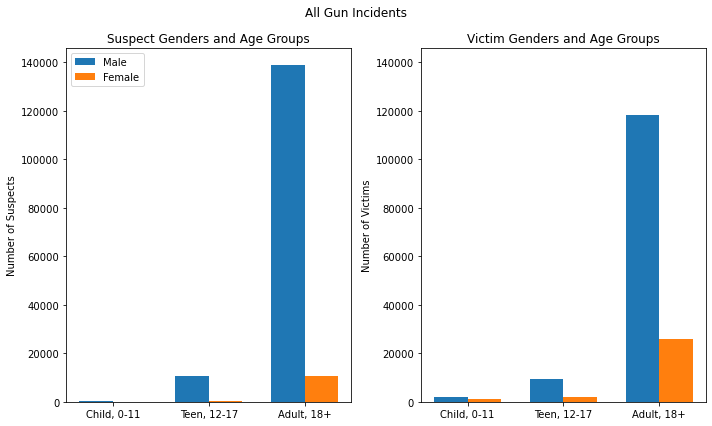

In [258]:
create_breakdown_plot(new_gun_df, 'All Gun Incidents')

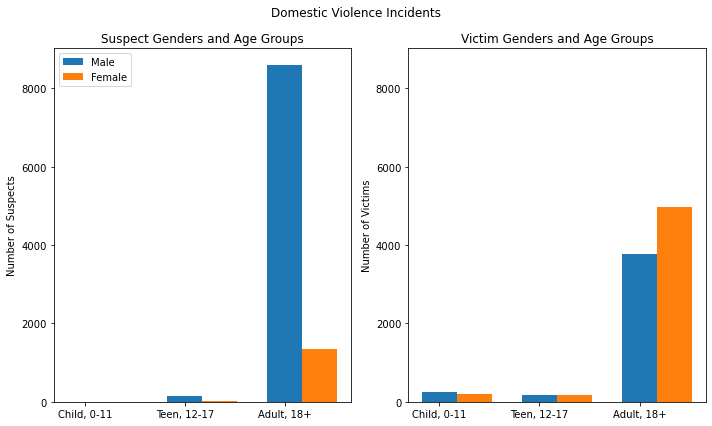

In [24]:
domestic_violence = new_gun_df[new_gun_df['incident_characteristics'].str.contains('Domestic Violence')]
create_breakdown_plot(domestic_violence, 'Domestic Violence Incidents')

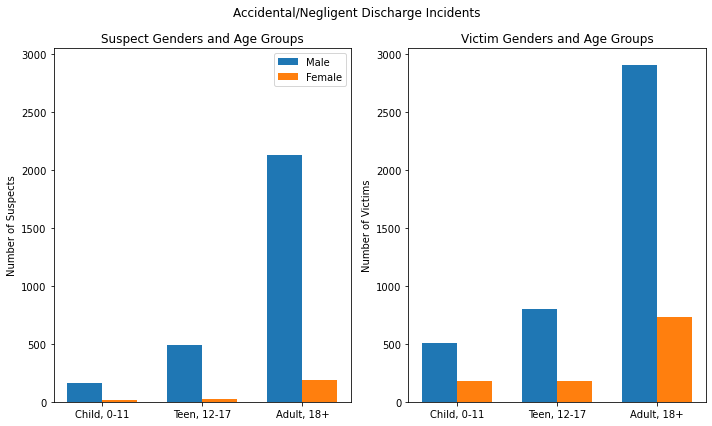

In [259]:
accidental_discharge = new_gun_df[new_gun_df['incident_characteristics'].str.contains('Accidental/Negligent Discharge')]
create_breakdown_plot(accidental_discharge, 'Accidental/Negligent Discharge Incidents')

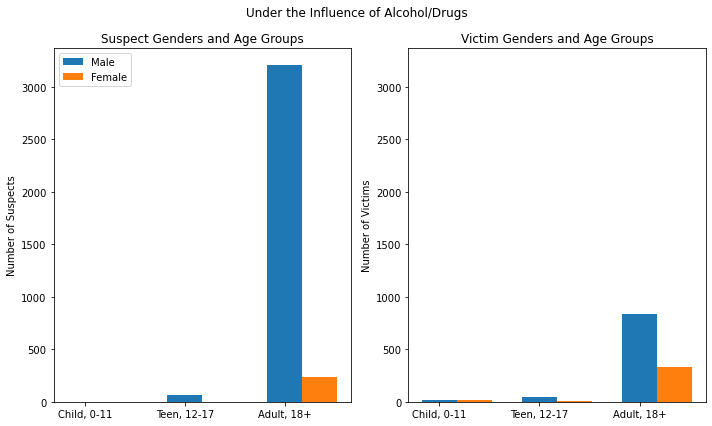

In [26]:
alcohol_drugs = new_gun_df[new_gun_df['incident_characteristics'].str.contains('Under the influence of alcohol or drugs')]
create_breakdown_plot(alcohol_drugs, 'Under the Influence of Alcohol/Drugs')

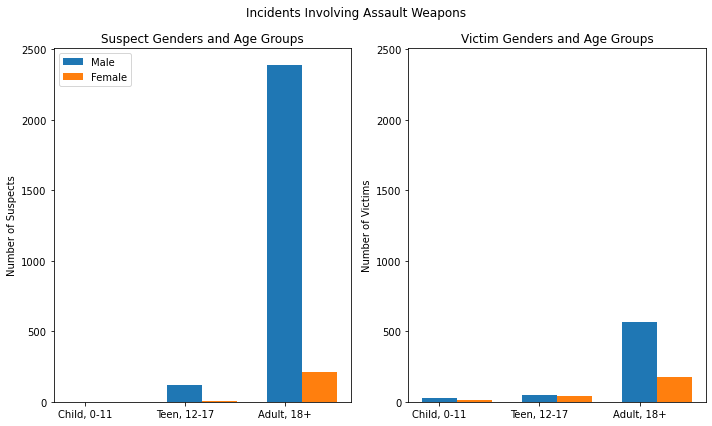

In [27]:
assault_weapon = new_gun_df[new_gun_df['incident_characteristics'].str.contains('Assault weapon')]
create_breakdown_plot(assault_weapon, 'Incidents Involving Assault Weapons')

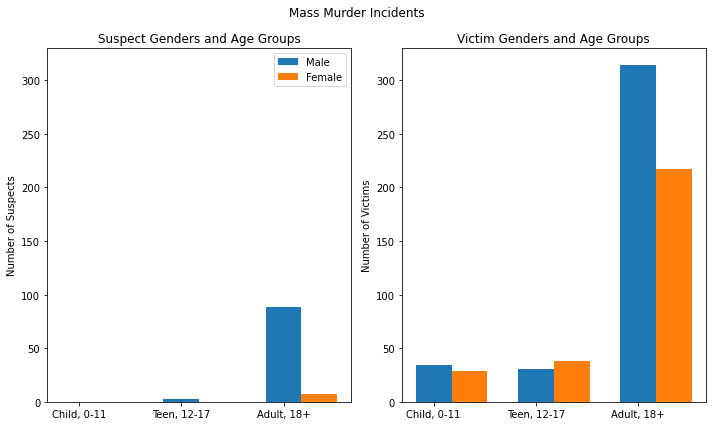

In [28]:
mass_murder = new_gun_df[new_gun_df['incident_characteristics'].str.contains('Mass Murder')]
create_breakdown_plot(mass_murder, 'Mass Murder Incidents')

## How does the probability that a victim is underage change given that a gun incident was an accidental/negligent discharge?

In [265]:
total_victims = new_gun_df[new_gun_df['participant_type'] == 'Victim']
total_victims = total_victims[~total_victims['participant_age_group'].isna()]

accidental_discharge_victims = accidental_discharge[accidental_discharge['participant_type'] == 'Victim']
accidental_discharge_victims = accidental_discharge_victims[~accidental_discharge_victims['participant_age_group'].isna()]

0.20646221248630886
0.2342141292442497


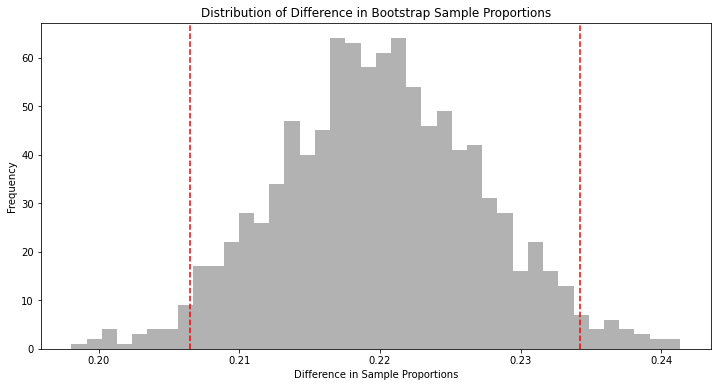

In [300]:
def bootstrap_sample_proportion(df):
    bootstrap_victim_ages = np.random.choice(df['participant_age_group'].values, size=len(accidental_discharge_victims), replace=True)
    bva = np.array(list(map(lambda x: 0 if x == 'Adult 18+' else 1, bootstrap_victim_ages)))
    return sum(bva)/len(bva)

def bootstrap_difference_proportions(df1, df2, bootstrap_samples=1000):
    proportion_differences = []
    for i in range(bootstrap_samples):
        proportion1 = bootstrap_sample_proportion(df1)
        proportion2 = bootstrap_sample_proportion(df2)
        proportion_differences.append(proportion2-proportion1)
    return np.array(proportion_differences)

data = bootstrap_difference_proportions(total_victims, accidental_discharge_victims)

fig, ax = plt.subplots(figsize=(12,6))
ax.hist(data, bins=40, alpha=0.6, color='grey')
ax.set_xlabel('Difference in Sample Proportions')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Difference in Bootstrap Sample Proportions')
ax.axvline(np.percentile(data, 2.5), linestyle='--', color='r')
ax.axvline(np.percentile(data, 97.5), linestyle='--', color='r')
print(np.percentile(data, 2.5))
print(np.percentile(data, 97.5))

# Hypothesis testing for deadliness of incidents involving assault weapons

In [29]:
aw_casualties = assault_weapon.groupby('incident_id').aggregate('mean')[['n_killed', 'n_injured']]
mean_assault_weapon_death_rate = sum(aw_casualties['n_killed'])/len(aw_casualties)
mean_assault_weapon_death_rate

0.22173489278752437

In [30]:
total_gun_casualties = new_gun_df.groupby('incident_id').aggregate('mean')[['n_killed', 'n_injured']]
total_mean_death_rate = sum(total_gun_casualties['n_killed'])/len(total_gun_casualties)
total_mean_death_rate

0.2522905922996045

Weird, definitely not what I would have expected. Incidents involving assault weapons seem to have fewer deaths per incident than the deaths per incident across all types of gun incidents. What's going on there?

In [31]:
len(new_gun_df[new_gun_df['incident_characteristics'].str.contains('Non-Shooting Incident')]['incident_id'].unique())/len(new_gun_df['incident_id'].unique())

0.18707338239957275

In [32]:
len(assault_weapon[assault_weapon['incident_characteristics'].str.contains('Non-Shooting Incident')]['incident_id'].unique())/len(assault_weapon['incident_id'].unique())

0.6174463937621832

Here we've discovered a pretty big confounding variable. Over 60% of logged incidents involving an assault weapon were actually non-shooting incidents, compared to under 20% of all gun incidents being logged as non-shooting incidents. What happens if we control for only those events which were not logged as non-shooting incidents?

In [33]:
assault_weapon_violent = assault_weapon[~assault_weapon['incident_characteristics'].str.contains('Non-Shooting Incident')]
total_gun_violent = new_gun_df[~new_gun_df['incident_characteristics'].str.contains('Non-Shooting Incident')]

total_gun_violent_deaths = sum(total_gun_violent.groupby('incident_id').aggregate('mean')['n_killed'])
total_gun_violent_death_rate = total_gun_violent_deaths / len(total_gun_violent['incident_id'].unique())
total_gun_violent_death_rate

0.31025102777164737

In [142]:
assault_weapon_violent_deaths = sum(assault_weapon_violent.groupby('incident_id').aggregate('mean')['n_killed'])
assault_weapon_violent_death_rate = assault_weapon_violent_deaths / len(assault_weapon_violent['incident_id'].unique())
assault_weapon_violent_death_rate

0.5796178343949044

When you filter out non-shooting incidents, the death rate for incidents involving an assault weapon more than doubles, and is close to twice the death rate for all gun-incidents that were not logged as 'non-shooting incidents'.

### Plotting the sampling distribution using the Central Limit Theorem

Ttest_indResult(statistic=-3.3750381901402937, pvalue=0.0007743326775700441)

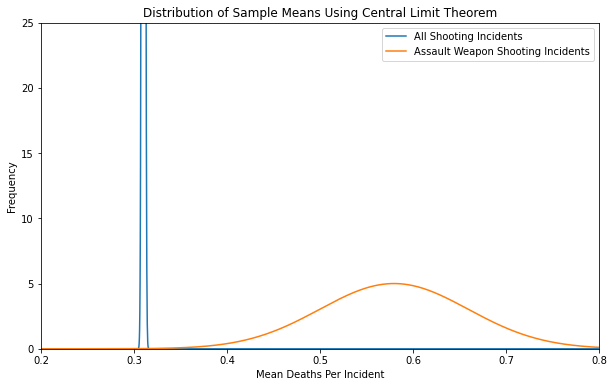

In [185]:
total_gun_deaths_array = total_gun_violent.groupby('incident_id').aggregate('mean')['n_killed'].values
assault_weapon_deaths_array = assault_weapon_violent.groupby('incident_id').aggregate('mean')['n_killed'].values

total_deaths_dist = stats.norm(loc=np.mean(total_gun_deaths_array), scale=np.std(total_gun_deaths_array)/np.sqrt(len(total_gun_deaths_array)))
aw_deaths_dist = stats.norm(loc=np.mean(assault_weapon_deaths_array), scale=np.std(assault_weapon_deaths_array)/np.sqrt(len(assault_weapon_deaths_array)))

x = np.linspace(0, 1, 4000)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, total_deaths_dist.pdf(x), label='All Shooting Incidents')
ax.plot(x, aw_deaths_dist.pdf(x), label='Assault Weapon Shooting Incidents')
ax.set_xlim(.2,.8)
ax.set_ylim(0,25)
ax.legend()
ax.set_xlabel('Mean Deaths Per Incident')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Sample Means Using Central Limit Theorem')

stats.ttest_ind(total_gun_deaths_array, assault_weapon_deaths_array, equal_var=False)

## Exploring correlations between certain incident characteristics

In [36]:
characteristics_df = new_gun_df.copy()

In [37]:
characteristics_df['domestic_violence'] = characteristics_df['incident_characteristics'].apply(lambda x: 1 if 'Domestic Violence' in x else 0)
characteristics_df['accidental_shooting'] = characteristics_df['incident_characteristics'].apply(lambda x: 1 if 'Accidental Shooting' in x else 0)
characteristics_df['under_the_influence'] = characteristics_df['incident_characteristics'].apply(lambda x: 1 if 'Under the influence of alcohol or drugs' in x else 0)
characteristics_df['defensive_use'] = characteristics_df['incident_characteristics'].apply(lambda x: 1 if 'Defensive Use' in x else 0)
characteristics_df['assault_weapon'] = characteristics_df['incident_characteristics'].apply(lambda x: 1 if 'Assault weapon' in x else 0)
characteristics_df['mass_shooting'] = characteristics_df['incident_characteristics'].apply(lambda x: 1 if 'Mass Shooting' in x else 0)

In [38]:
characteristics_df[['domestic_violence', 'accidental_shooting', 'under_the_influence', 'defensive_use', 'assault_weapon', 'mass_shooting']].corr()

,domestic_violence,accidental_shooting,under_the_influence,defensive_use,assault_weapon,mass_shooting
domestic_violence,1.000000,-0.022762,0.058324,0.024723,0.008646,0.012129
accidental_shooting,-0.022762,1.000000,0.044276,-0.016347,-0.006385,-0.026797
under_the_influence,0.058324,0.044276,1.000000,0.022393,0.023336,-0.001819
defensive_use,0.024723,-0.016347,0.022393,1.000000,0.000828,-0.013246
assault_weapon,0.008646,-0.006385,0.023336,0.000828,1.000000,0.070129
mass_shooting,0.012129,-0.026797,-0.001819,-0.013246,0.070129,1.000000


## Hypothesis test: Does owning a gun make you safer?

Comparing the rate of incidence of a victim or victims employing defensive use and avoiding death vs. rate of incidence of injury or death as a result of accidental discharge. 

In [159]:
sum((new_gun_df['incident_characteristics'].str.contains('Accidental/Negligent Discharge') 
     & (new_gun_df['participant_type']=='Victim') 
     & (~new_gun_df['participant_status'].str.contains('Unharmed'))))

5712

In [160]:
sum((new_gun_df['incident_characteristics'].str.contains('Defensive Use') 
     & (new_gun_df['participant_type'] == 'Victim') 
     & (~new_gun_df['participant_status'].str.contains('Killed'))))

7236

In [186]:
new_gun_df[new_gun_df['incident_characteristics'].str.contains('Suicide\^')]['incident_characteristics']
new_gun_df.iloc[20, 7]

'Shot - Wounded/Injured||Shot - Dead (murder, accidental, suicide)||Suicide^||Murder/Suicide||Attempted Murder/Suicide (one variable unsuccessful)||Domestic Violence'

## Plotting distribution of deaths and casualties

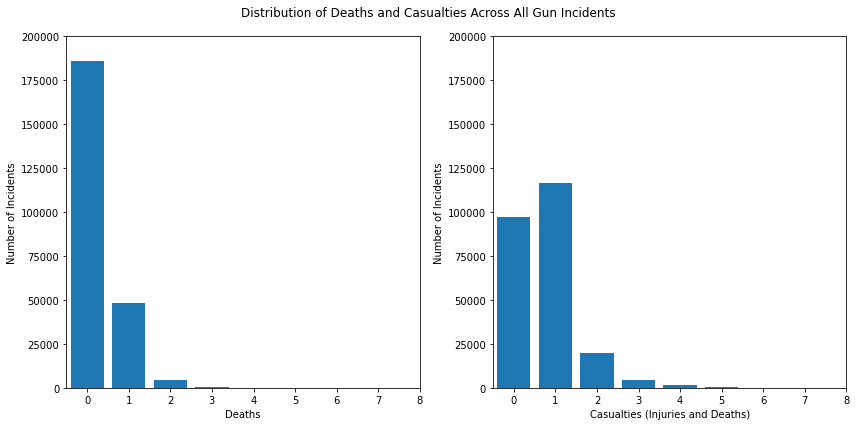

In [149]:
total_killed_injured = new_gun_df.groupby('incident_id').aggregate('mean')[['n_killed', 'n_injured']]
total_killed_injured['n_casualties'] = total_killed_injured['n_killed'] + total_killed_injured['n_injured']

x = list(range(9))
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].bar(x, total_killed_injured['n_killed'].value_counts()[x])
axs[1].bar(x, total_killed_injured['n_casualties'].value_counts()[x])

axs[0].set_xlim(-.5,7.5)
axs[1].set_xlim(-.5,7.5)
axs[0].set_ylim(top=200000)
axs[1].set_ylim(top=200000)
axs[0].set_xlabel('Deaths')
axs[0].set_ylabel('Number of Incidents')
axs[1].set_xlabel('Casualties (Injuries and Deaths)')
axs[1].set_ylabel('Number of Incidents')
fig.suptitle('Distribution of Deaths and Casualties Across All Gun Incidents')
axs[0].set_xticks(x)
axs[1].set_xticks(x)
fig.tight_layout()



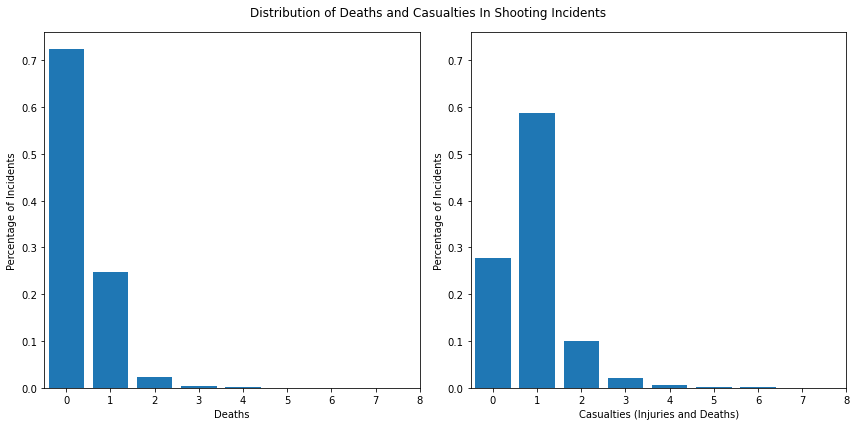

In [221]:
total_killed_injured = new_gun_df[~new_gun_df['incident_characteristics'].str.contains('Non-Shooting Incident')].groupby('incident_id').aggregate('mean')[['n_killed', 'n_injured']]
total_killed_injured['n_casualties'] = total_killed_injured['n_killed'] + total_killed_injured['n_injured']

x = list(range(9))
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].bar(x, (total_killed_injured['n_killed'].value_counts() / len(total_killed_injured))[x])
axs[1].bar(x, (total_killed_injured['n_casualties'].value_counts() / len(total_killed_injured))[x])

axs[0].set_xlim(-.5,7.5)
axs[1].set_xlim(-.5,7.5)
axs[1].set_ylim(top = axs[0].get_ylim()[1])
axs[0].set_xlabel('Deaths')
axs[0].set_ylabel('Percentage of Incidents')
axs[1].set_xlabel('Casualties (Injuries and Deaths)')
axs[1].set_ylabel('Percentage of Incidents')
fig.suptitle('Distribution of Deaths and Casualties In Shooting Incidents')
axs[0].set_xticks(x)
axs[1].set_xticks(x)
fig.tight_layout()


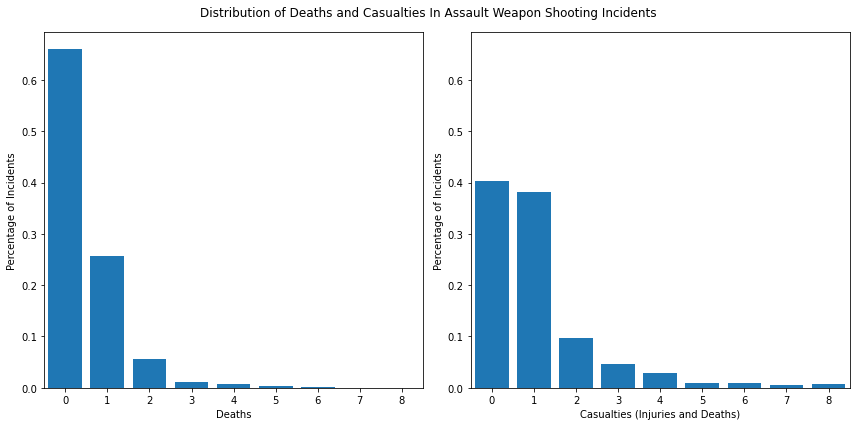

In [219]:
assault_weapon_killed_injured = new_gun_df[(new_gun_df['incident_characteristics'].str.contains('Assault weapon')) & (~new_gun_df['incident_characteristics'].str.contains('Non-Shooting Incident'))].groupby('incident_id').aggregate('mean')[['n_killed', 'n_injured']]
assault_weapon_killed_injured['n_casualties'] = assault_weapon_killed_injured['n_killed'] + assault_weapon_killed_injured['n_injured']

index = list(range(11))
data = np.full(shape=(11,1), fill_value=0)
plot_data = pd.DataFrame(data=data, index=index, columns=['dummy'])
plot_data_n_killed = plot_data.join(assault_weapon_killed_injured['n_killed'].value_counts(), how='left').fillna(value=0)
plot_data_n_killed['percentage'] = plot_data_n_killed['n_killed']/len(assault_weapon_killed_injured)
plot_data_n_casualties = plot_data.join(assault_weapon_killed_injured['n_casualties'].value_counts(), how='left')
plot_data_n_casualties['percentage'] = plot_data_n_casualties['n_casualties']/len(assault_weapon_killed_injured)

x = list(range(11))
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].bar(x, plot_data_n_killed['percentage'][x])
axs[1].bar(x, plot_data_n_casualties['percentage'][x])

axs[0].set_xlim(-.5,8.5)
axs[1].set_xlim(-.5,8.5)
axs[1].set_ylim(top=axs[0].get_ylim()[1])
axs[0].set_xlabel('Deaths')
axs[0].set_ylabel('Percentage of Incidents')
axs[1].set_xlabel('Casualties (Injuries and Deaths)')
axs[1].set_ylabel('Percentage of Incidents')
fig.suptitle('Distribution of Deaths and Casualties In Assault Weapon Shooting Incidents')
# axs[0].set_xticks(x)
# axs[1].set_xticks(x)
fig.tight_layout()





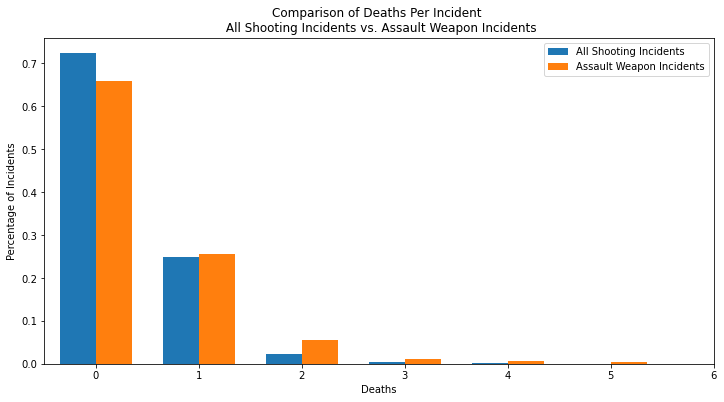

In [251]:
x = np.arange(7)
width = 0.35
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x - width/2, (total_killed_injured['n_killed'].value_counts() / len(total_killed_injured))[x], width=width, label='All Shooting Incidents')
ax.bar(x + width/2, plot_data_n_killed['percentage'][x], width=width, label='Assault Weapon Incidents')
ax.set_xlim(-.5,6)
ax.set_xticks(x)
ax.set_title('Comparison of Deaths Per Incident \n All Shooting Incidents vs. Assault Weapon Incidents')
ax.set_ylabel('Percentage of Incidents')
ax.set_xlabel('Deaths')
ax.legend();
# axs[1].bar(x, plot_data_n_killed['percentage'][x])
# axs[1].set_ylim(top=axs[0].get_ylim()[1])
# axs[0].set_ylabel('Percentage of Incidents')
# axs[1].set_ylabel('Percentage of Incidents')
# axs[0].set_title('All Shooting Incidents')
# axs[1].set_title('Assault Weapon Incidents')
# fig.suptitle('Comparison of Deaths Per Incident')



## Plotting on US map

In [41]:
import geopandas as gpd
import descartes
import geoplot
from shapely.geometry import Point, Polygon

<AxesSubplot:>

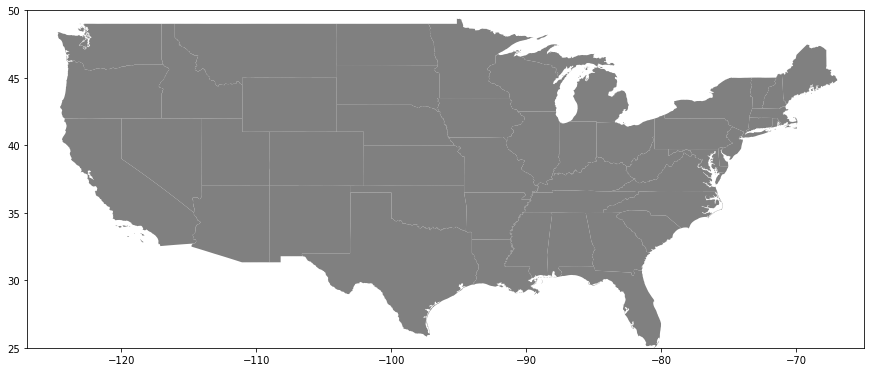

In [67]:
usmap = gpd.read_file('data/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim(-127, -65)
ax.set_ylim(25, 50)
usmap.plot(ax=ax, color='grey')

In [307]:
clean_lat_long = gun_df[['n_killed', 'n_injured', 'longitude', 'latitude', 'incident_characteristics']].dropna()

In [308]:
geometry = [Point(xy) for xy in zip(clean_lat_long['longitude'], clean_lat_long['latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(clean_lat_long, crs = crs, geometry=geometry)
geo_df

,n_killed,n_injured,longitude,latitude,incident_characteristics,geometry
0,0,4,-79.8559,40.3467,Shot - Wounded/Injured||Mass Shooting (4+ vict...,POINT (-79.85590 40.34670)
1,1,3,-118.3330,33.9090,"Shot - Wounded/Injured||Shot - Dead (murder, a...",POINT (-118.33300 33.90900)
2,1,3,-82.1377,41.4455,"Shot - Wounded/Injured||Shot - Dead (murder, a...",POINT (-82.13770 41.44550)
3,4,0,-104.8020,39.6518,"Shot - Dead (murder, accidental, suicide)||Off...",POINT (-104.80200 39.65180)
4,2,2,-79.9569,36.1140,"Shot - Wounded/Injured||Shot - Dead (murder, a...",POINT (-79.95690 36.11400)
...,...,...,...,...,...,...
239671,0,0,-117.2350,47.6638,Non-Shooting Incident||Possession (gun(s) foun...,POINT (-117.23500 47.66380)
239673,1,0,-93.0836,31.7537,"Shot - Dead (murder, accidental, suicide)||Ins...",POINT (-93.08360 31.75370)
239674,0,1,-90.0442,29.9239,Shot - Wounded/Injured,POINT (-90.04420 29.92390)
239675,1,0,-95.6110,29.7201,"Shot - Dead (murder, accidental, suicide)",POINT (-95.61100 29.72010)


Text(0.5, 1.0, 'Gun Related Deaths Across the US, 2013-2018')

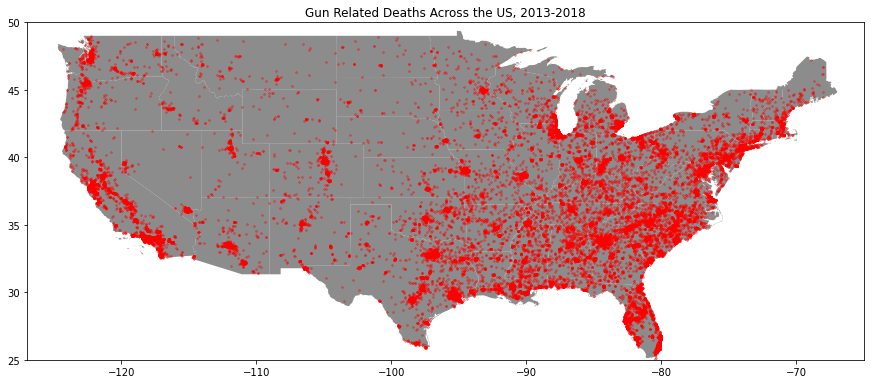

In [132]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim(-127, -65)
ax.set_ylim(25, 50)
usmap.plot(ax=ax, color='grey', alpha=.9)
geo_df[geo_df['n_killed'] > 0].plot(ax=ax, markersize=3, alpha=.4, color='red', marker='x')
plt.title('Gun Related Deaths Across the US, 2013-2018')

In [61]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd


/Users/AustinCaldwell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/AustinCaldwell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

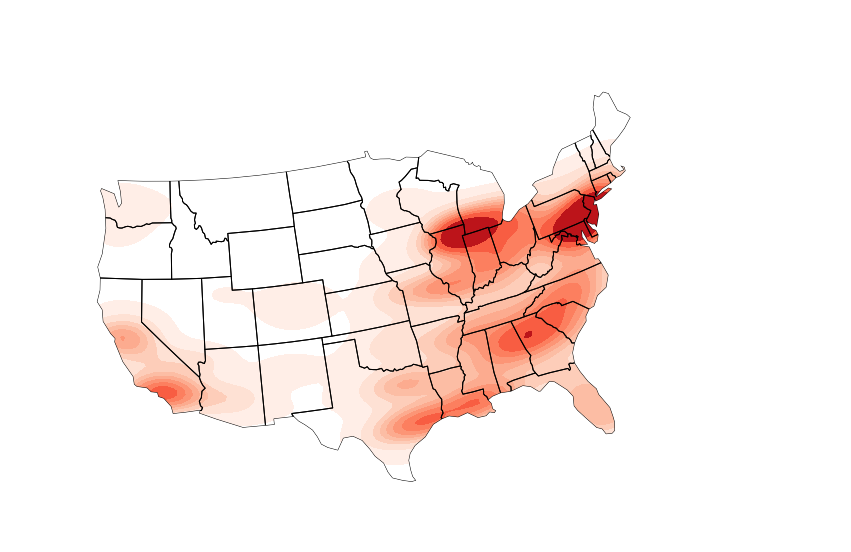

In [309]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
mapping = geo_df[geo_df['n_killed']>0]
mapping = mapping[~mapping['incident_characteristics'].str.contains('Officer Involved Incident')]
ax = gplt.kdeplot(mapping, cmap='Reds', shade=True, clip=contiguous_usa.geometry, projection=gcrs.AlbersEqualArea(), figsize = (15,15))
gplt.polyplot(contiguous_usa, ax=ax, zorder=1)

In [105]:
deaths_per_state = gun_df[gun_df['n_killed']>0].groupby('state').aggregate('sum')['n_killed']
deaths_per_state

state
Alabama                 1880
Alaska                   267
Arizona                 1094
Arkansas                 773
California              5562
Colorado                 796
Connecticut              341
Delaware                 217
District of Columbia     459
Florida                 3909
Georgia                 2456
Hawaii                    63
Idaho                    166
Illinois                3409
Indiana                 1608
Iowa                     273
Kansas                   542
Kentucky                1066
Louisiana               2179
Maine                    112
Maryland                1691
Massachusetts            472
Michigan                1588
Minnesota                461
Mississippi             1176
Missouri                2136
Montana                  154
Nebraska                 225
Nevada                   799
New Hampshire             88
New Jersey              1168
New Mexico               495
New York                1705
North Carolina          2225
North Da

In [104]:
contiguous_usa_deaths = contiguous_usa.join(deaths_per_state, on='state')
contiguous_usa_deaths

,state,adm1_code,population,geometry,n_killed
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",461
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",154
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",69
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",166
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",853
5,Arizona,USA-3520,6392017,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",1094
6,California,USA-3521,37253956,"POLYGON ((-114.35490 34.46467, -114.16597 34.2...",5562
7,Colorado,USA-3522,5029196,"POLYGON ((-102.05017 40.00082, -102.04012 38.4...",796
8,Nevada,USA-3523,2700551,"POLYGON ((-114.03053 36.99410, -114.02363 36.1...",799
9,New Mexico,USA-3524,2059179,"POLYGON ((-103.00161 33.87995, -103.00161 31.9...",495


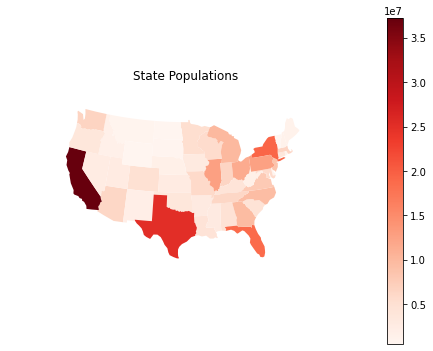

In [129]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    cmap='Reds', legend=True)
plt.title('State Populations');
plt.savefig('state_populations.png')

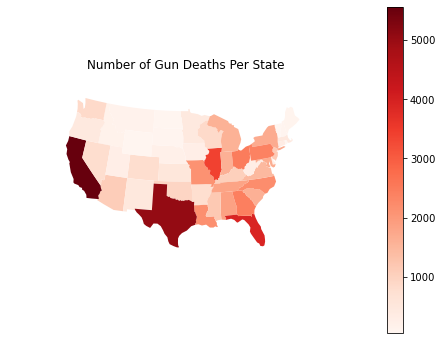

In [126]:
gplt.choropleth(
    contiguous_usa_deaths, hue='n_killed', projection=gcrs.AlbersEqualArea(),
    cmap='Reds', legend=True)
plt.title('Number of Gun Deaths Per State');

In [108]:
contiguous_usa_deaths['deaths_per_person'] = contiguous_usa_deaths['n_killed']/contiguous_usa_deaths['population']
contiguous_usa_deaths

,state,adm1_code,population,geometry,n_killed,deaths_per_person
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",461,0.000087
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",154,0.000156
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",69,0.000103
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",166,0.000106
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",853,0.000127
5,Arizona,USA-3520,6392017,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",1094,0.000171
6,California,USA-3521,37253956,"POLYGON ((-114.35490 34.46467, -114.16597 34.2...",5562,0.000149
7,Colorado,USA-3522,5029196,"POLYGON ((-102.05017 40.00082, -102.04012 38.4...",796,0.000158
8,Nevada,USA-3523,2700551,"POLYGON ((-114.03053 36.99410, -114.02363 36.1...",799,0.000296
9,New Mexico,USA-3524,2059179,"POLYGON ((-103.00161 33.87995, -103.00161 31.9...",495,0.000240


Text(0.5, 1.0, 'Gun Deaths Per Person')

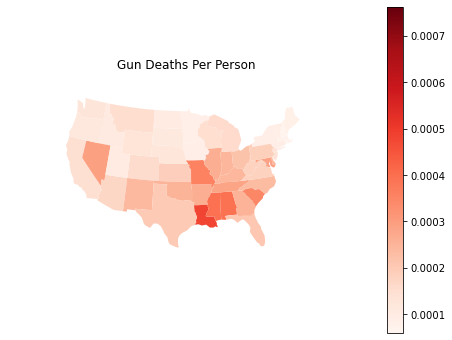

In [130]:
gplt.choropleth(
    contiguous_usa_deaths, hue='deaths_per_person', projection=gcrs.AlbersEqualArea(),
    cmap='Reds', legend=True)
plt.title('Gun Deaths Per Person')

In [315]:
sum(state_proportions['predicted_num_incidents'])

237111.46679999997

In [111]:
props = [.1191, .0874, .0647, .0586, .0386, .0382, .0352, .0320, .0316, .0301, .0268, .0257, .0229, .0219, .0209, .0206, .0203, .0185, .0182, .0175, .0174, .0170, .0155, .0148, .0140, .0135, .0127, .0119, .0107, .0097, .0095, .0093, .0091, .0090, .0088, .0063, .0058, .0054, .0054, .0043, .0041, .0041, .0032, .0032, .0029, .0027, .0023, .0022, .0021, .0019, .0017]
states = ['California', 'Texas', 'Florida', 'New York', 'Illinois', 'Pennsylvania', 'Ohio', 'Georgia', 'North Carolina', 'Michigan', 'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Massachusetts', 'Tennessee', 'Indiana', 'Missouri', 'Maryland', 'Wisconsin', 'Colorado', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana', 'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Utah', 'Iowa', 'Nevada', 'Arkansas', 'Mississippi', 'Kansas', 'New Mexico', 'Nebraska', 'West Virginia', 'Idaho', 'Hawaii', 'New Hampshire', 'Maine', 'Montana', 'Rhode Island', 'Delaware', 'South Dakota', 'North Dakota', 'Alaska', 'District of Columbia', 'Vermont', 'Wyoming']
state_proportions = pd.DataFrame(data=np.array(props)/sum(props), index=states, columns=['population_proportion'])
state_proportions['predicted_num_incidents'] = state_proportions['population_proportion'] * len(new_gun_df.groupby('incident_id'))
state_proportions

,population_proportion,predicted_num_incidents
California,0.120388,28854.151016
Texas,0.088345,21174.246841
Florida,0.065400,15674.757101
New York,0.059234,14196.920651
Illinois,0.039017,9351.555241
Pennsylvania,0.038613,9254.647933
Ohio,0.035581,8527.843121
Georgia,0.032346,7752.584656
North Carolina,0.031942,7655.677348
Michigan,0.030426,7292.274942


In [112]:
observed_incidents = gun_df.groupby('state').aggregate('count')['incident_id'].rename('observed_incidents')
state_predicted_observed = state_proportions.join(observed_incidents)
state_predicted_observed

,population_proportion,predicted_num_incidents,observed_incidents
California,0.120388,28854.151016,16306
Texas,0.088345,21174.246841,13577
Florida,0.065400,15674.757101,15029
New York,0.059234,14196.920651,9712
Illinois,0.039017,9351.555241,17556
Pennsylvania,0.038613,9254.647933,8929
Ohio,0.035581,8527.843121,10244
Georgia,0.032346,7752.584656,8925
North Carolina,0.031942,7655.677348,8739
Michigan,0.030426,7292.274942,6136


In [113]:
state_predicted_observed['predicted_deaths'] = state_predicted_observed['population_proportion'] * sum(gun_df['n_killed'])
state_predicted_observed

,population_proportion,predicted_num_incidents,observed_incidents,predicted_deaths
California,0.120388,28854.151016,16306,7279.630850
Texas,0.088345,21174.246841,13577,5342.063277
Florida,0.065400,15674.757101,15029,3954.593753
New York,0.059234,14196.920651,9712,3581.749520
Illinois,0.039017,9351.555241,17556,2359.309411
Pennsylvania,0.038613,9254.647933,8929,2334.860609
Ohio,0.035581,8527.843121,10244,2151.494592
Georgia,0.032346,7752.584656,8925,1955.904175
North Carolina,0.031942,7655.677348,8739,1931.455372
Michigan,0.030426,7292.274942,6136,1839.772364


In [114]:
observed_deaths = gun_df.groupby('state').aggregate('sum')['n_killed'].rename('observed_deaths')
state_predicted_observed = state_predicted_observed.join(observed_deaths)
state_predicted_observed

,population_proportion,predicted_num_incidents,observed_incidents,predicted_deaths,observed_deaths
California,0.120388,28854.151016,16306,7279.630850,5562
Texas,0.088345,21174.246841,13577,5342.063277,5046
Florida,0.065400,15674.757101,15029,3954.593753,3909
New York,0.059234,14196.920651,9712,3581.749520,1705
Illinois,0.039017,9351.555241,17556,2359.309411,3409
Pennsylvania,0.038613,9254.647933,8929,2334.860609,2395
Ohio,0.035581,8527.843121,10244,2151.494592,2508
Georgia,0.032346,7752.584656,8925,1955.904175,2456
North Carolina,0.031942,7655.677348,8739,1931.455372,2225
Michigan,0.030426,7292.274942,6136,1839.772364,1588


In [119]:
state_predicted_observed['predicted - observed'] = state_predicted_observed['observed_deaths'] - state_predicted_observed['predicted_deaths']

In [301]:
state_predicted_observed['percent_difference'] = state_predicted_observed['predicted - observed']/state_predicted_observed['predicted_deaths'] * 100
state_predicted_observed

,population_proportion,predicted_num_incidents,observed_incidents,predicted_deaths,observed_deaths,predicted - observed,percent_above_or_below_predicted,percent_difference
California,0.120388,28854.151016,16306,7279.630850,5562,-1717.630850,-0.235950,-23.595027
Texas,0.088345,21174.246841,13577,5342.063277,5046,-296.063277,-0.055421,-5.542115
Florida,0.065400,15674.757101,15029,3954.593753,3909,-45.593753,-0.011529,-1.152931
New York,0.059234,14196.920651,9712,3581.749520,1705,-1876.749520,-0.523976,-52.397565
Illinois,0.039017,9351.555241,17556,2359.309411,3409,1049.690589,0.444914,44.491434
Pennsylvania,0.038613,9254.647933,8929,2334.860609,2395,60.139391,0.025757,2.575717
Ohio,0.035581,8527.843121,10244,2151.494592,2508,356.505408,0.165701,16.570128
Georgia,0.032346,7752.584656,8925,1955.904175,2456,500.095825,0.255685,25.568524
North Carolina,0.031942,7655.677348,8739,1931.455372,2225,293.544628,0.151981,15.198106
Michigan,0.030426,7292.274942,6136,1839.772364,1588,-251.772364,-0.136850,-13.684974


In [302]:
state_predicted_observed[['population_proportion', 'predicted_deaths', 'observed_deaths', 'percent_difference']]

,population_proportion,predicted_deaths,observed_deaths,percent_difference
California,0.120388,7279.630850,5562,-23.595027
Texas,0.088345,5342.063277,5046,-5.542115
Florida,0.065400,3954.593753,3909,-1.152931
New York,0.059234,3581.749520,1705,-52.397565
Illinois,0.039017,2359.309411,3409,44.491434
Pennsylvania,0.038613,2334.860609,2395,2.575717
Ohio,0.035581,2151.494592,2508,16.570128
Georgia,0.032346,1955.904175,2456,25.568524
North Carolina,0.031942,1931.455372,2225,15.198106
Michigan,0.030426,1839.772364,1588,-13.684974


In [305]:
state_predicted_observed['percent_difference'].sort_values().to_frame().head(10)

,percent_difference
Hawaii,-76.029643
Rhode Island,-67.789833
New Hampshire,-64.884309
Massachusetts,-63.051389
Minnesota,-55.633578
Maine,-55.307302
Iowa,-52.984458
Utah,-52.435846
New York,-52.397565
North Dakota,-50.917841


### Performing chi-squared test on observed deaths vs. predicted deaths

In [252]:
stats.chisquare(f_obs=state_predicted_observed['observed_deaths'], f_exp=state_predicted_observed['predicted_deaths'])

Power_divergenceResult(statistic=11930.358004615642, pvalue=0.0)

The p-value is virtually zero, allowing us to reject the null hypothesis that the number of deaths from gun violence in a state is directly proportional to that state's population.